In [4]:
import graph
import pandas
import numpy
import matplotlib
%matplotlib inline

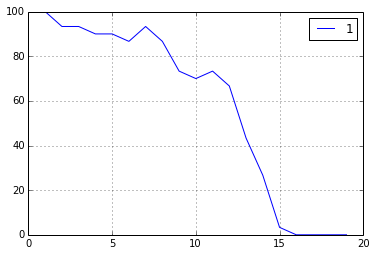

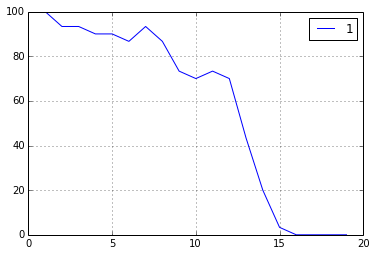

In [7]:
vaccinationpercent = 0
orderedpairlistHighEpi = []
orderedpairlistLowEpi = []
while vaccinationpercent < 200:
    trials = 30
    HighEpi = 0
    FinalEpi = 0
    for x in range(trials):

        g = graph.Graph(5, .5, 0, vaccinationpercent)   #k,p,r,%infected,%vaccinated
        g.makeVertices(200)         #of people
        g.makeConnections(.02)         #prob they are connected
        g.update()            #number of repetitions, num trials
        if g.getHighEpi():
            HighEpi += 1
        if g.getFinalEpi():
            FinalEpi += 1
    
    orderedpairlistHighEpi = orderedpairlistHighEpi + [[vaccinationpercent,(float(HighEpi)/float(trials))*100]]
    orderedpairlistLowEpi = orderedpairlistLowEpi + [[vaccinationpercent, (float(FinalEpi)/float(trials))*100]]

    y = (vaccinationpercent,(float(HighEpi)/float(trials))*100 , (float(FinalEpi)/float(trials))*100)
    
    vaccinationpercent += 10

    
df = pandas.DataFrame(orderedpairlistHighEpi)
df1 = pandas.DataFrame(orderedpairlistLowEpi)
del df[0]
del df1[0]
df.plot()
df1.plot()